In [5]:
import numpy as np
import scipy.fft as sf
import scipy.signal as ss
import matplotlib.pyplot as plt
%matplotlib widget
import scipy

scipy.__version__

'1.12.0'

# SciPy implementation of Welch method

`scipy.signal` provide an implementation of [Welch method](https://en.wikipedia.org/wiki/Welch%27s_method) to estimate sprectum of signal with function [welch()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch)

Start with a white noise, and try to estimate with spectrum the variance of noise

In [6]:
np.random.seed(5)
nb_s = 30000
sigma = 20
noise = np.random.normal(0,sigma,nb_s)
print("Variance of the noise: ", np.var(noise))

Variance of the noise:  402.0426798742416


## Power spectrum using Welch's method
### With rectangle window "boxcar"

Déviation standard estimée avec normalisation n_periodogram/2 : 20.071363110135184


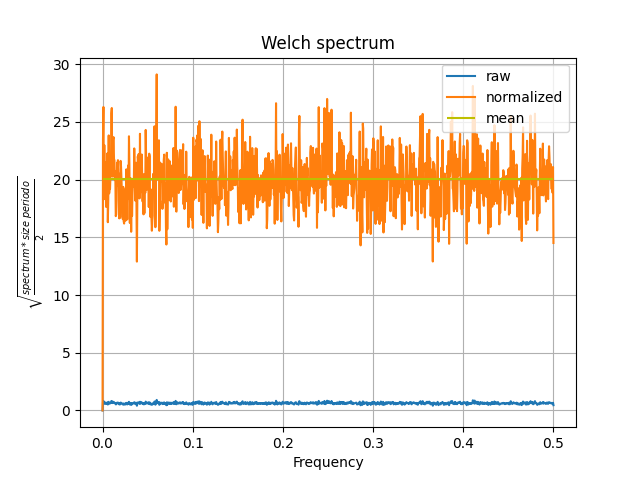

In [7]:
# number of sample in periodogram
nperseg=2048
freq , specw_noise = ss.welch(noise, window="boxcar", scaling="spectrum", nperseg=nperseg)
plt.figure()
plt.title('Welch spectrum')
plt.plot(freq , np.sqrt(specw_noise), label="raw")
plt.plot(freq , np.sqrt(specw_noise*nperseg/2), label="normalized")
plt.xlabel('Frequency')
plt.ylabel(r'$\sqrt{\frac{spectrum*size\ periodo}{2}}$')
plt.grid()
var_spec = specw_noise[1:-2].mean()*nperseg/2
plt.hlines(np.sqrt(var_spec),0,freq[-1] , colors="y", label="mean")
plt.legend()
print("Déviation standard estimée avec normalisation n_periodogram/2 :",np.sqrt(var_spec))

### with window hann 

Déviation standard estimée avec normalisation n_periodogram/2 : 24.636322034606362


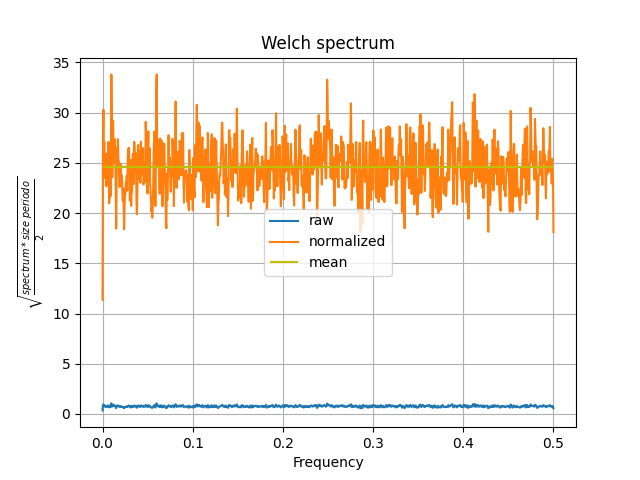

In [8]:
freq , specw_noise = ss.welch(noise, window="hann", scaling="spectrum", nperseg=nperseg)

plt.figure()
plt.title('Welch spectrum')
plt.plot(freq , np.sqrt(specw_noise), label="raw")
plt.plot(freq , np.sqrt(specw_noise*nperseg/2), label="normalized")
plt.xlabel('Frequency')
plt.ylabel(r'$\sqrt{\frac{spectrum*size\ periodo}{2}}$')
plt.grid()
var_spec = specw_noise[1:-2].mean()*nperseg/2
plt.hlines(np.sqrt(var_spec),0,freq[-1] , colors="y", label="mean")
plt.legend()

print("Déviation standard estimée avec normalisation n_periodogram/2 :",np.sqrt(var_spec))

L'estimation est biaisée, la normalisation n'est pas la bonne. 

#### Somme des fenêtres d'apodisation 

In [9]:
hann = ss.get_window('hann', nperseg)
print("hann sum:",hann.sum())
boxcar = ss.get_window('boxcar', nperseg)
print("boxcar sum:",boxcar.sum())
print("taylor sum:",ss.get_window('taylor', nperseg).sum())

hann sum: 1024.0
boxcar sum: 2048.0
taylor sum: 1314.8145586042851


## PSD : densité du spectre de puissance


402.0426798742416
20.043168618135077


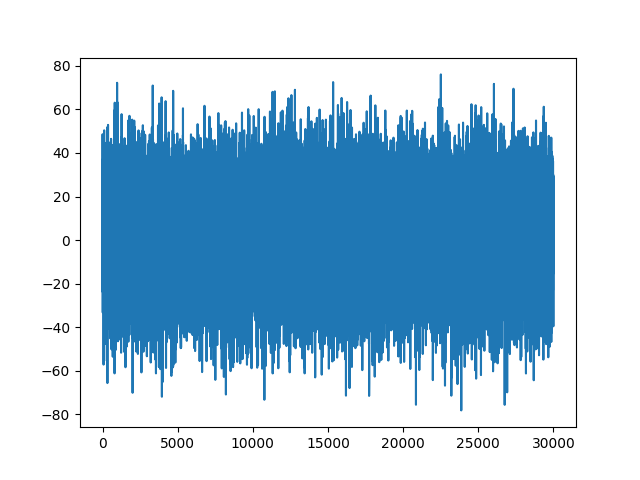

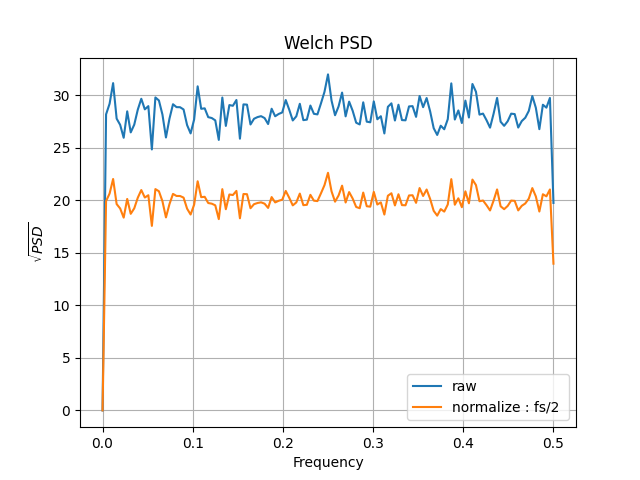

In [10]:
nperseg=256
fs=1.0
freq, psdw_noise = ss.welch(noise,  window="boxcar", fs=fs, scaling="density", nperseg=nperseg)
plt.figure()
plt.plot(noise)
print(noise.var())
plt.figure()
plt.plot(freq, np.sqrt(psdw_noise), label="raw")
plt.plot(freq, np.sqrt(psdw_noise*fs/2), label="normalize : fs/2 ")
plt.title('Welch PSD')
plt.xlabel('Frequency')
plt.ylabel(r'$\sqrt{PSD}$')
plt.grid()
plt.legend()
v_mean = psdw_noise[1:-2].mean()
print(np.sqrt(v_mean*fs/2))


80.31298273401184
20.039084651501906


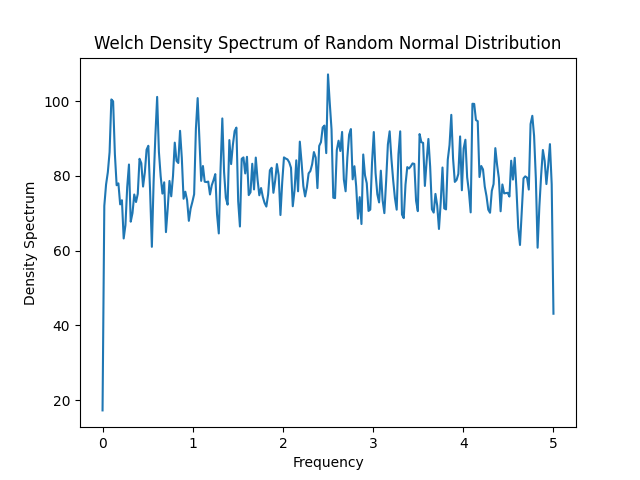

In [11]:
freq, specw_noise = ss.welch(noise, fs=10.0, scaling="density", nperseg=512)
plt.figure()
plt.plot(freq, specw_noise)
plt.title('Welch Density Spectrum of Random Normal Distribution')
plt.xlabel('Frequency')
plt.ylabel('Density Spectrum')
v_mean = specw_noise[1:-2].mean()
print(v_mean )
fs=10
print(np.sqrt(v_mean*fs/2))


Relation entre la espérance PSD $\sigma_{PSD}$, valeur moyenne ici et celle utilisée dans le générateur de bruit $\sigma_{nor}$:

$\sigma_{nor}=\sigma_{psd} \sqrt{\frac{f_s}{2}}$
